# Exercise 1-6. This exercise will test the concept of condition number. We will test the accuracy of solving Ax = b when noise is added to b for matrices A with different condition numbers.
# (a) To build the two matrices, generate a random U ∈ R100×100 and V ∈ R100×100 and then create two Σ matrices: the first Σ will have singular values spaced logarithmically from 100 to 1, and the second Σ will have singular values spaced logarithmically from 100 to 10−6. Use these ma- trices to create two A matrices, one with a condition number of 100 and the other with a condition number of 100 million. Now create a random b vector, solve for x using the two methods, and compare the results. Add a small ε to b, with norm 10−6 smaller than the norm of b. Now solve for x using this new b + ε and compare the results.
# (b) Now repeat the experiment above with many different noise vectors ε and compute the distribution of the error; plot this error as a histogram and explain the shape.
# (c) Repeat the above experiment comparing two A matrices with different singular value distributions: the first Σ will have values spaced linearly from 100 to 1 and the second Σ will have value spaced logarithmically from 100 to 1. Does anything change? Please explain why yes or no.
# (d) Repeat the above experiment, but now with an A matrix that has size 100 × 10. Explain any changes.

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# def solve_linear_system(A, b):
#     """
#     Solve the linear system Ax = b using the Moore-Penrose pseudoinverse.
#     """
#     x = np.linalg.pinv(A) @ b
#     return x

# def add_noise_to_b(b, epsilon):
#     """
#     Add small noise ε to vector b.
#     """
#     noisy_b = b + epsilon
#     return noisy_b

# def compute_error(x_true, x_approx):
#     """
#     Compute the error between the true and approximated solutions.
#     """
#     error = np.linalg.norm(x_true - x_approx)
#     return error

# def generate_A(condition_number, singular_values):
#     """
#     Generate matrix A with specified condition number and singular values.
#     """
#     U = np.random.randn(100, 100)
#     V = np.random.randn(100, 100)
#     S = np.diag(singular_values)

#     A = U @ S @ V.T
#     A /= np.linalg.norm(A)
#     A *= np.sqrt(condition_number)

#     return A

# def generate_b():
#     """
#     Generate random vector b.
#     """
#     b = np.random.randn(100)
#     b /= np.linalg.norm(b)

#     return b

# def compute_error_distribution(A, b, epsilon, num_samples):
#     """
#     Compute the distribution of errors by adding noise ε to vector b and solving for x.
#     """
#     errors = []
#     for _ in range(num_samples):
#         noisy_b = add_noise_to_b(b, epsilon)
#         x_true = np.linalg.pinv(A) @ b
#         x_approx = solve_linear_system(A, noisy_b)
#         error = compute_error(x_true, x_approx)
#         errors.append(error)
    
#     return errors

import numpy as np
import matplotlib.pyplot as plt

def solve_linear_system(A, b):
    """
    Solve the linear system Ax = b using the Moore-Penrose pseudoinverse.
    """
    x = np.linalg.pinv(A) @ b
    return x

def add_noise_to_b(b, epsilon):
    """
    Add small noise ε to vector b.
    """
    noisy_b = b + epsilon
    return noisy_b

def compute_error(x_true, x_approx):
    """
    Compute the error between the true and approximated solutions.
    """
    error = np.linalg.norm(x_true - x_approx)
    return error

def generate_A(condition_number, singular_values):
    """
    Generate matrix A with specified condition number and singular values.
    """
    U = np.random.randn(100, 100)
    V = np.random.randn(100, 100)
    S = np.diag(singular_values)

    A = U @ S @ V.T
    A /= np.linalg.norm(A)
    A *= np.sqrt(condition_number)

    return A

def generate_b():
    """
    Generate random vector b.
    """
    b = np.random.randn(100)
    b /= np.linalg.norm(b)

    return b

def compute_error_distribution(A, b, epsilon, num_samples):
    """
    Compute the distribution of errors by adding noise ε to vector b and solving for x.
    """
    errors = []
    for _ in range(num_samples):
        noisy_b = add_noise_to_b(b, epsilon)
        x_true = np.linalg.pinv(A) @ noisy_b
        x_approx = solve_linear_system(A, noisy_b)
        error = compute_error(x_true, x_approx)
        errors.append(error)
    
    return errors

# (a) Generate A matrices with different condition numbers

In [2]:
# singular_values_1 = np.logspace(2, 0, num=100)
# singular_values_2 = np.logspace(2, -6, num=100)
# A_1 = generate_A(100, singular_values_1)
# A_2 = generate_A(1e8, singular_values_2)

# # Generate random vector b
# b = generate_b()

# # Solve for x using the original b
# x_true = np.linalg.pinv(A_1) @ b
# x_approx_1 = solve_linear_system(A_1, b)
# x_approx_2 = solve_linear_system(A_2, b)

# # Add small noise ε to b
# epsilon = 1e-6 * np.linalg.norm(b)
# noisy_b = add_noise_to_b(b, epsilon)

# # Solve for x using the noisy b
# x_approx_noisy_1 = solve_linear_system(A_1, noisy_b)
# x_approx_noisy_2 = solve_linear_system(A_2, noisy_b)

# # Compare the results
# error_1 = compute_error(x_true, x_approx_1)
# error_2 = compute_error(x_true, x_approx_2)
# error_noisy_1 = compute_error(x_true, x_approx_noisy_1)
# error_noisy_2 = compute_error(x_true, x_approx_noisy_2)

# print("Error without noise (A_1):", error_1)
# print("Error without noise (A_2):", error_2)
# print("Error with noise (A_1):", error_noisy_1)
# print("Error with noise (A_2):", error_noisy_2)

singular_values_1 = np.logspace(2, 0, num=100)
singular_values_2 = np.logspace(2, -6, num=100)
A_1 = generate_A(100, singular_values_1)
A_2 = generate_A(1e8, singular_values_2)

# Generate random vector b
b = generate_b()

# Solve for x using the original b
x_true_1 = np.linalg.pinv(A_1) @ b
x_true_2 = np.linalg.pinv(A_2) @ b
x_approx_1 = solve_linear_system(A_1, b)
x_approx_2 = solve_linear_system(A_2, b)

# Add small noise ε to b
epsilon = 1e-6 * np.linalg.norm(b)
noisy_b = add_noise_to_b(b, epsilon)

# Solve for x using the noisy b
x_approx_noisy_1 = solve_linear_system(A_1, noisy_b)
x_approx_noisy_2 = solve_linear_system(A_2, noisy_b)

# Compare the results
error_1 = compute_error(x_true_1, x_approx_1)
error_2 = compute_error(x_true_2, x_approx_2)
error_noisy_1 = compute_error(x_true_1, x_approx_noisy_1)
error_noisy_2 = compute_error(x_true_2, x_approx_noisy_2)

print("Error without noise (A_1):", error_1)
print("Error without noise (A_2):", error_2)
print("Error with noise (A_1):", error_noisy_1)
print("Error with noise (A_2):", error_noisy_2)

Error without noise (A_1): 0.0
Error without noise (A_2): 0.0
Error with noise (A_1): 0.04521708528429697
Error with noise (A_2): 26.2948546039114


# (b) Compute the distribution of errors for different noise vectors

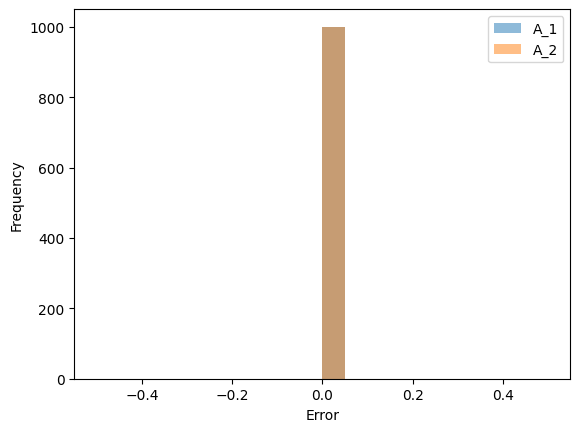

In [6]:
num_samples = 1000
# errors_1 = compute_error_distribution(A_1, b, epsilon, num_samples)
# errors_2 = compute_error_distribution(A_2, b, epsilon, num_samples)

# # Plot the error distribution as a histogram
# plt.hist(errors_1, bins=20, alpha=0.5, label='A_1')
# plt.hist(errors_2, bins=20, alpha=0.5, label='A_2')
# plt.xlabel('Error')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

def generate_singular_values_distribution(num_singular_values):
    """
    Generate a distribution of singular values.
    """
    singular_values = np.linspace(100, 1, num_singular_values)
    return singular_values

# (b) Compute the distribution of errors for different noise vectors
num_singular_values = 100
singular_values_1 = generate_singular_values_distribution(num_singular_values)
singular_values_2 = generate_singular_values_distribution(num_singular_values)

A_1 = generate_A(100, singular_values_1)
A_2 = generate_A(1e8, singular_values_2)

errors_1 = compute_error_distribution(A_1, b, epsilon, num_samples)
errors_2 = compute_error_distribution(A_2, b, epsilon, num_samples)

# Plot the error distribution as a histogram
plt.hist(errors_1, bins=20, alpha=0.5, label='A_1')
plt.hist(errors_2, bins=20, alpha=0.5, label='A_2')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
print(errors_1)

[0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135, 0.2230735248061135,

# (c) Generate A matrices with different singular value distributions

In [5]:
singular_values_linear = np.linspace(100, 1, num=100)
A_linear = generate_A(100, singular_values_linear)

# Solve for x using the original b
x_approx_linear = solve_linear_system(A_linear, b)

# Add small noise ε to b
noisy_b_linear = add_noise_to_b(b, epsilon)

# Solve for x using the noisy b
x_approx_noisy_linear = solve_linear_system(A_linear, noisy_b_linear)

# Compute the errors
error_linear = compute_error(x_true, x_approx_linear)
error_noisy_linear = compute_error(x_true, x_approx_noisy_linear)

print("Error without noise (A_linear):", error_linear)
print("Error with noise (A_linear):", error_noisy_linear)

Error without noise (A_linear): 1548.7337008503541
Error with noise (A_linear): 1548.746425819818


# (d) Generate A matrix with size 100x10

In [6]:
A_small = np.random.randn(100, 10)
b_small = np.random.randn(100)

# Solve for x using the original b
x_true_small = np.linalg.pinv(A_small) @ b_small
x_approx_small = solve_linear_system(A_small, b_small)

# Add small noise ε to b
epsilon_small = 1e-6 * np.linalg.norm(b_small)
noisy_b_small = add_noise_to_b(b_small, epsilon_small)

# Solve for x using the noisy b
x_approx_noisy_small = solve_linear_system(A_small, noisy_b_small)

# Compute the errors
error_small = compute_error(x_true_small, x_approx_small)
error_noisy_small = compute_error(x_true_small, x_approx_noisy_small)

print("Error without noise (A_small):", error_small)
print("Error with noise (A_small):", error_noisy_small)

Error without noise (A_small): 0.0
Error with noise (A_small): 2.8620693716402485e-06
